In [81]:
import pandas as pd
import os

# example on subset of dataset
PATH = r'C:\Users\grede\Documents\EPFL\Master\ADA\Project\Raw\BindingDB_All.tsv'
df = pd.read_csv(PATH, sep='\t', on_bad_lines='skip')

df["Target Source Organism According to Curator or DataSource"].value_counts()

C:\Users\grede\AppData\Local\Temp\ipykernel_16380\2691318024.py:6: DtypeWarning: Columns (8,9,10,11,12,13,15,17,20,21,22,23,27,28,32,33,35,36,45,46,47,48,50,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,69,70,71,72,74,75,76,77,78,79,81,82,83,86,87,88,89,90,91,93,94,95,98,99,100,101,102,103,105,106,107,110,111,112,113,114,115,117,118,119,122,123,124,125,126,127,129,130,131,134,135,136,137,138,139,146,147,148,149,150,151,158,159,160,161,162,163,170,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH, sep='\t', on_bad_lines='skip')


Target Source Organism According to Curator or DataSource
Homo sapiens                                                          1541006
Rattus norvegicus                                                      109758
Mus musculus                                                            49854
Rattus                                                                  33713
Human immunodeficiency virus 1                                          21780
                                                                       ...   
Maedi visna virus (strain 1514 / clone LV1-1KS2)                            1
Aeromonas allosaccharophila                                                 1
Bovine viral diarrhea virus (strain CP7)                                    1
Haemophilus influenzae (strain ATCC 51907 / DSM 11121 / KW20 / Rd)          1
Human cytomegalovirus                                                       1
Name: count, Length: 329, dtype: int64

In [82]:
df = df[df["Target Source Organism According to Curator or DataSource"]=="Homo sapiens"]

In [83]:
for col in df.columns:
    print(col)

BindingDB Reactant_set_id
Ligand SMILES
Ligand InChI
Ligand InChI Key
BindingDB MonomerID
BindingDB Ligand Name
Target Name
Target Source Organism According to Curator or DataSource
Ki (nM)
IC50 (nM)
Kd (nM)
EC50 (nM)
kon (M-1-s-1)
koff (s-1)
pH
Temp (C)
Curation/DataSource
Article DOI
BindingDB Entry DOI
PMID
PubChem AID
Patent Number
Authors
Institution
Link to Ligand in BindingDB
Link to Target in BindingDB
Link to Ligand-Target Pair in BindingDB
Ligand HET ID in PDB
PDB ID(s) for Ligand-Target Complex
PubChem CID
PubChem SID
ChEBI ID of Ligand
ChEMBL ID of Ligand
DrugBank ID of Ligand
IUPHAR_GRAC ID of Ligand
KEGG ID of Ligand
ZINC ID of Ligand
Number of Protein Chains in Target (>1 implies a multichain complex)
BindingDB Target Chain Sequence
PDB ID(s) of Target Chain
UniProt (SwissProt) Recommended Name of Target Chain
UniProt (SwissProt) Entry Name of Target Chain
UniProt (SwissProt) Primary ID of Target Chain
UniProt (SwissProt) Secondary ID(s) of Target Chain
UniProt (SwissPro

In [108]:
import seaborn as sns
from matplotlib import pyplot as plt
from pysmiles import read_smiles
from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
import numpy as np


def show_smiles(df, title="", n_rows=5, n_cols=5):
    unique_smiles = df["Ligand SMILES"].unique()

    n_sampled = n_rows*n_cols
    rd_smiles = np.random.choice(unique_smiles, n_sampled, replace=False)

    element_colors = {
        'O': 'red',   
        'C': 'black', 
        'N': 'darkblue'  
    }

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(2*n_cols,2*n_rows))

    for ax, i in zip(axes.flat, np.arange(n_sampled)):
        mol = Chem.MolFromSmiles(rd_smiles[i])
        img = Draw.MolToImage(mol)
        ax.imshow(img)
        ax.axis("off")



        # mol = read_smiles(rd_smiles[i])
        # node_elements = nx.get_node_attributes(mol, 'element')
        # node_colors = [element_colors.get(node_elements[node], 'gray') for node in mol.nodes()]
        # nx.draw_kamada_kawai(mol, node_size=5, ax=ax, node_color=node_colors, with_labels=False)

    fig.suptitle(title)
    plt.show()

# show_smiles(df) #just for testing

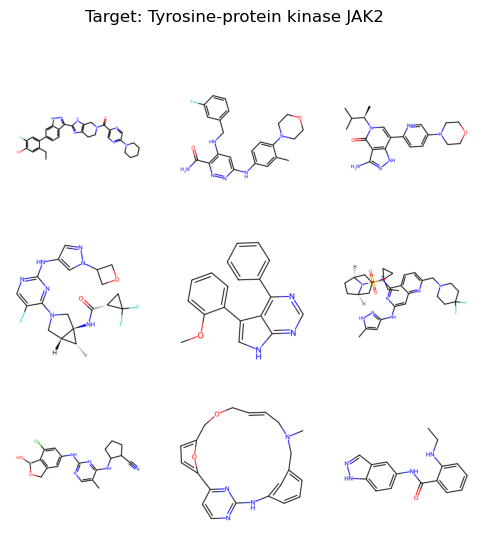

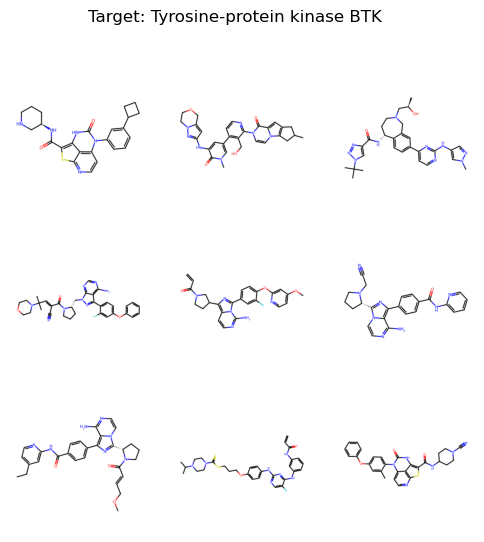

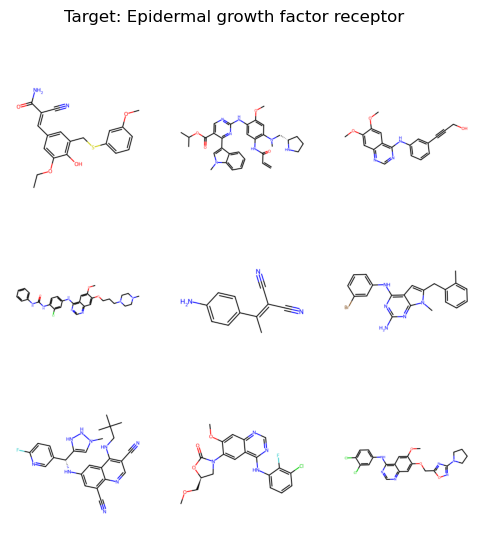

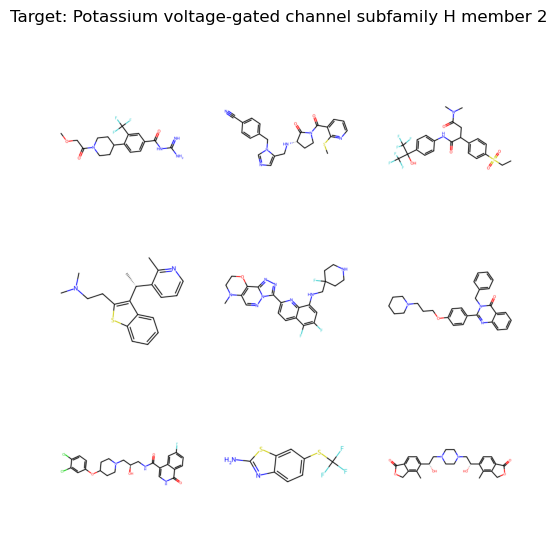

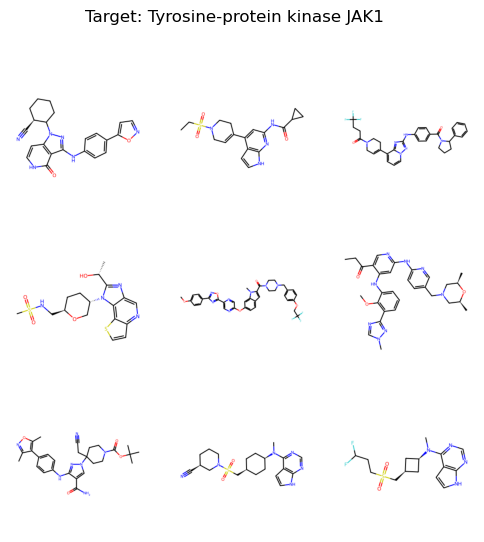

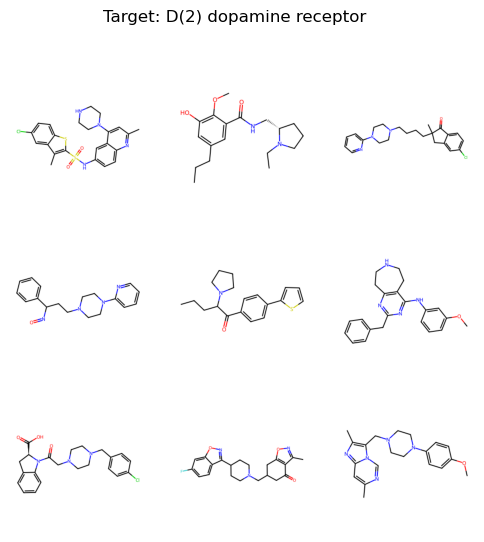

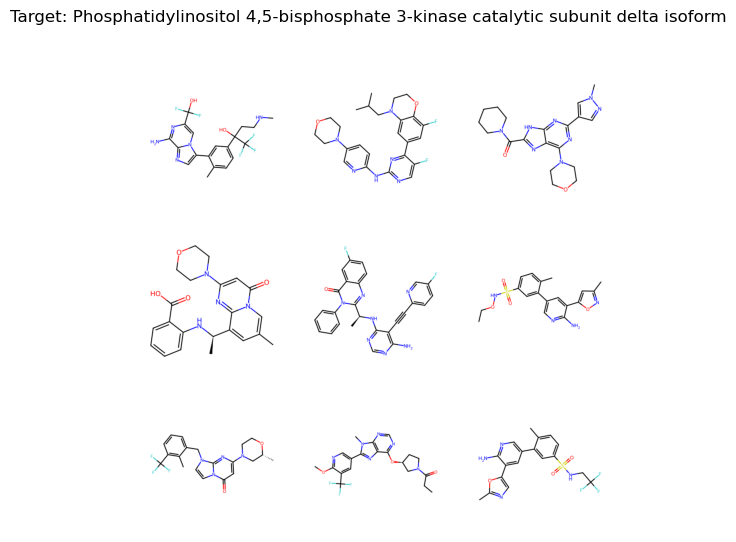

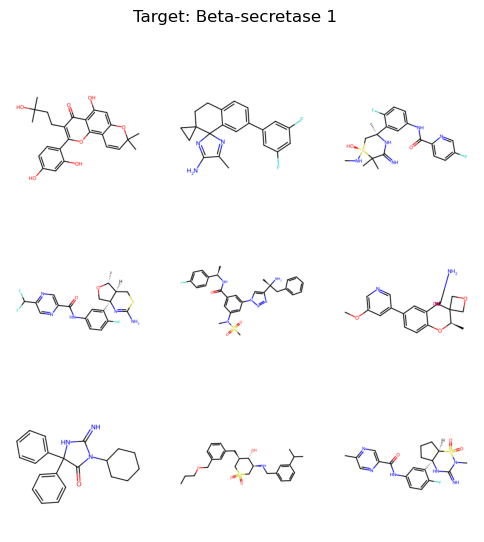

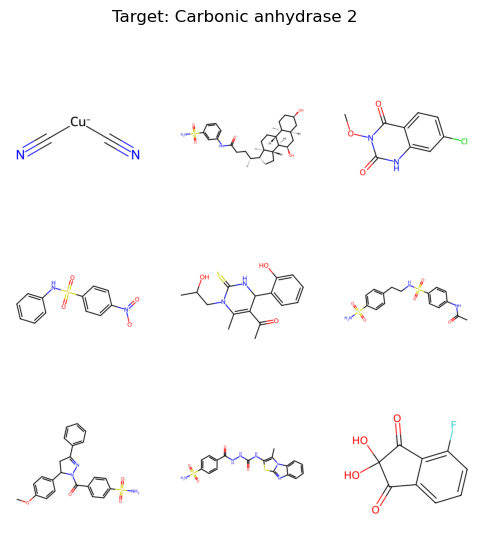

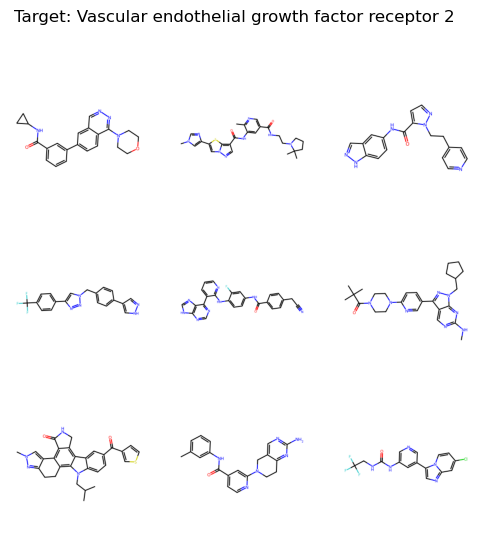

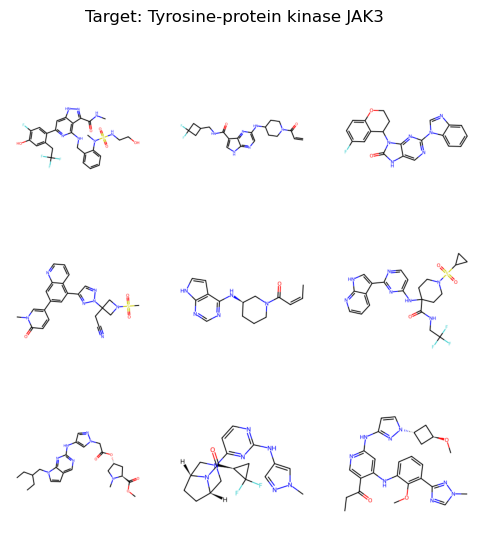

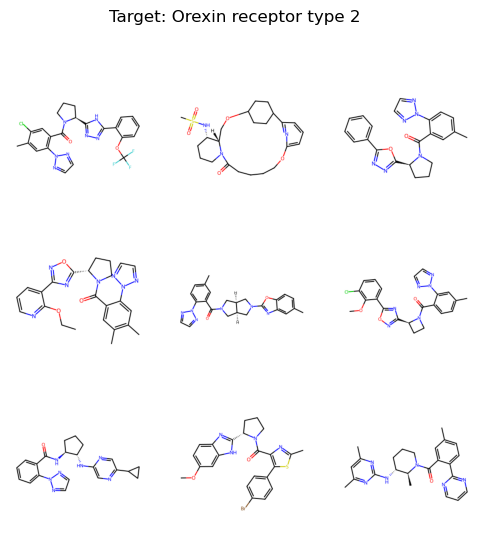

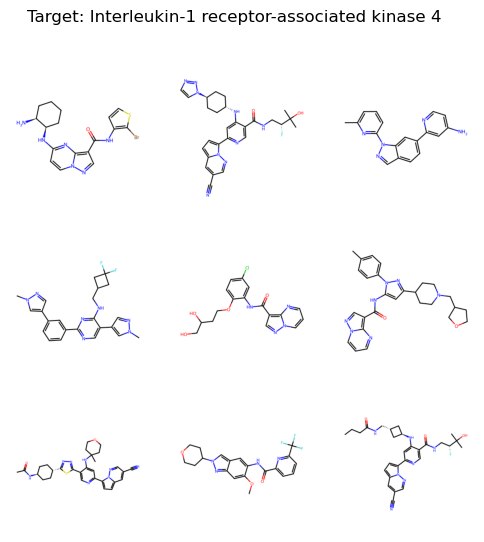

In [109]:
df[["Target Source Organism According to Curator or DataSource", "Ligand SMILES"]]

target_count = pd.DataFrame(df["Target Name"].value_counts())
target_count = target_count[target_count["count"]>13000]
target_count

for target in target_count.index:
    # print(target)
    show_smiles(df[df["Target Name"] == target], title=f"Target: {target}",n_rows=3,n_cols=3)

In [146]:
#looking at binding kinetics, trying to establish a ranking
df_kinetics = df[["Ligand SMILES",
                  "Target Name",
                  "Ki (nM)",
                  "IC50 (nM)",
                  "Kd (nM)",
                  "EC50 (nM)",
                  "kon (M-1-s-1)",
                  "koff (s-1)",
                  "pH",
                  "Temp (C)"]]

#number rows in homo sapiens which have available data
for col in df_kinetics.columns:
    a = df_kinetics[~df_kinetics[col].isna()].shape[0]
    print("{}:\t{:.2%}".format(col, a/1541006))
    #--> based on this, I look only ar IC50 for the moment (maybe Ki?)

Ligand SMILES:	100.00%
Target Name:	100.00%
Ki (nM):	21.01%
IC50 (nM):	66.05%
Kd (nM):	4.40%
EC50 (nM):	8.63%
kon (M-1-s-1):	0.05%
koff (s-1):	0.05%
pH:	7.49%
Temp (C):	6.82%


In [153]:
df_IC50 = df_kinetics[~df_kinetics["IC50 (nM)"].isna()]
df_IC50
#--> need to clean

,Ligand SMILES,Target Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH,Temp (C)
142,Cc1nc(CN2CCN(CC2)c2c(Cl)cnc3[nH]c(nc23)-c2cn(C...,Cytochrome P450 3A4,NaN,>50000,NaN,NaN,NaN,NaN,NaN,NaN
1900,CC1(O)CN(CCC11CCN(C1=O)c1ccc(OC(F)(F)F)cc1)S(=...,Hormone-sensitive lipase,NaN,740,NaN,NaN,NaN,NaN,7.2,4.00 C
1961,Fc1ccc(cc1)C1(CC1)C(=O)N1CC2CC2(C1)c1c[nH]c2nc...,11-beta-hydroxysteroid dehydrogenase 1,NaN,26,NaN,NaN,NaN,NaN,7.4,37.00 C
2863,CNC(=O)c1ccc2[C@H]3CCCN([C@H]3Cc2c1)C(=O)c1ccc...,11-beta-hydroxysteroid dehydrogenase 1,NaN,712,NaN,NaN,NaN,NaN,NaN,NaN
2870,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCNCCc4c3)nc12,Focal adhesion kinase 1,NaN,1033.14,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2912815,O[C@H]1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(Cc...,Serine/threonine-protein kinase PLK4,NaN,1320,NaN,NaN,NaN,NaN,NaN,NaN
2912816,OC1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(Cc3cc(...,Focal adhesion kinase 1,NaN,>100000,NaN,NaN,NaN,NaN,NaN,NaN
2912817,O[C@@H]1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(C...,Focal adhesion kinase 1,NaN,>100000,NaN,NaN,NaN,NaN,NaN,NaN
2912818,O[C@H]1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(Cc...,Focal adhesion kinase 1,NaN,>100000,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
def clean_single(s:str, pattern:list)->str:
    s = str(s)
    for p in pattern:
        s = s.replace(p,"")
    return float(s)

def clean_all(df:pd.DataFrame, pattern:list)->pd.DataFrame:
    df["IC50 (nM)"] = df["IC50 (nM)"].apply(clean_single, pattern=pattern)
    return df

df_IC50 = clean_all(df_IC50,[">","<"])
df_IC50["IC50 (nM)"]

C:\Users\grede\AppData\Local\Temp\ipykernel_16380\542528322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IC50 (nM)"] = df["IC50 (nM)"].apply(clean_single, pattern=pattern)


142         50000.00
1900          740.00
1961           26.00
2863          712.00
2870         1033.14
             ...    
2912815      1320.00
2912816    100000.00
2912817    100000.00
2912818    100000.00
2912908      1600.00
Name: IC50 (nM), Length: 1017775, dtype: float64